In [2]:
from ES import ES
import numpy as np
import matplotlib.pyplot as plt

from itertools import accumulate

## Zadanie 4. 
a) Zapoznaj się z problemem kinematyki odwrotnej
(Inverse Kinematics Problem).

b) W dalszej części zadania skup się na uproszczonym problemie omówionym na wykładzie, tzn.:
- rozpatrujemy ramię robota, przymocowane do podłoża w punkcie A, złożone z K sztywnych segmentów prostoliniowych S1, S2, ..., SK, o ustalonych długościach l1, l2, ..., lK,
- ramię może wyginać się w przegubach zmieniając kąt αk pod którym łączą się dwa kolejne segmenty Sk i Sk-1 (przez S0 oznaczmy podłoże), k = 1, 2, ..., K,
- dla każdego kąta αk dany jest przedział [ak, bk] ograniczający zakres jego wartości, k = 1, 2, ..., K,
- dany jest punkt docelowy B,
- zadanie polega na wyznaczeniu wartości kątów α1, α2, ..., αK w taki sposób, aby ramię robota znalazło się jak najbliżej punktu docelowego.

c) Napisz algorytm ewolucyjny rozwiązujący problem kinematyki odwrotnej określony w punkcie b. Stwórz przykładowe zestawy danych wejściowych opisujących problem o różnej wielkości i różnym poziomie trudności. Dokładnie przeanalizuj działanie algorytmu i otrzymane wyniki. Sprawdź różne ustawienia algorytmu.


In [3]:
def cost_func(population, l, dest):
    res = np.zeros(len(population))
    for i, angles in enumerate(population[:,0]):
        angles = list(accumulate(angles))
        p = np.array([sum(l*np.sin(angles)), sum(l*np.cos(angles))])
        res[i] = np.sqrt(((p-dest)**2).sum())
    return res

In [4]:
def draw(ind, l, dest):
    plt.figure()
    s = np.array([0, 0])
    plt.scatter(0, 0, c='black', s=100)
    plt.scatter(dest[1], dest[0], c='r', s=100)
    s_angs = 0
    for i, ang in enumerate(ind[0]):
        s_angs += ang
        e = s + np.array([l[i]*np.sin(s_angs), l[i]*np.cos(s_angs)])
        plt.plot([s[1], e[1]], [s[0], e[0]], c='black')
        s = e
        plt.scatter(s[1], s[0], c='black', s=30)
    plt.axis('equal')
    plt.show()

In [5]:
def inverse_kin(l, dest, domain=(-10*np.pi, 10*np.pi), max_iters=100):
    d = len(l)
    
    tau, tau0 = 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d))
    es = ES(domain=domain, init_domain=(max(domain[0], 0), min(domain[1], 2*np.pi)), dims=d, cost_func=lambda pop: cost_func(pop, l, dest), tau=tau, tau0=tau0, max_iters=max_iters)
    es.run()
    
    draw(es.best_ind, l, dest)
    print(f'cost func: {es.iter_min.min():.5}\nbest: {es.best_ind[0]}')

100%|██████████| 100/100 [00:04<00:00, 20.84it/s]


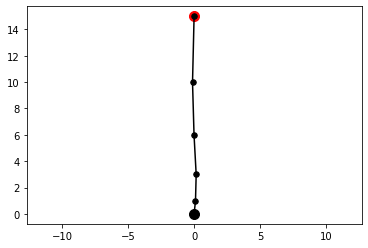

cost func: 0.013895
best: [1.46347079 6.36471872 0.0800997  6.25753321 6.23077476]


In [6]:
inverse_kin(np.array([1, 2, 3, 4, 5]), np.array([15, 0]))

100%|██████████| 100/100 [00:04<00:00, 20.51it/s]


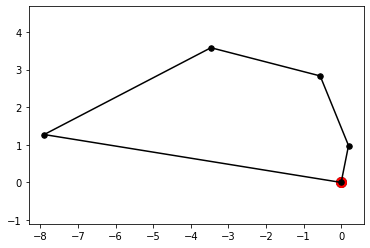

cost func: 4.4089e-10
best: [7.65655408 6.86736853 0.93138146 0.73266852 2.50167124]


In [7]:
inverse_kin(np.array([1, 2, 3, 5, 8]), np.array([0, 0]))

#### Randomly generated problem with 50 segments

100%|██████████| 500/500 [00:33<00:00, 14.76it/s]


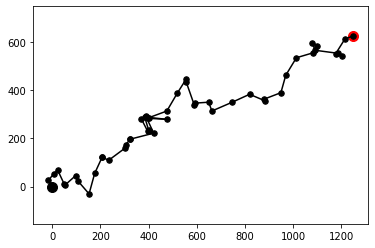

cost func: 0.0
best: [ 2.12586946  5.03628286 -0.11009622  4.38009493  6.186627    1.95805245
  4.36383919  6.61628096  2.16299477  6.11834139  3.80963472  0.8283551
  1.14468405  7.0920568   5.72031143 -0.06885233  5.71810147  1.75021576
  1.72647017  1.45880526  2.21806947  3.95239897  3.07082142  4.31580392
  3.19082897  4.62370196 -1.06967377  0.68542584 -0.03223069  3.63533626
  0.40616122  2.50414823  5.08146035  4.99637619  1.62682858  0.01869527
  5.45383214  2.52807792  4.522962    0.93160356  6.0104231   5.54577416
  0.76468317  1.49686153  2.45456188  1.14672525  5.82849599  3.41828023
  4.46240375  5.58233009]


In [8]:
l = np.random.randint(100, size=50)+1
dest = np.array([l.sum()/4, l.sum()/2])
inverse_kin(l, dest, max_iters=500)

#### Angles in (0, 90) degree

100%|██████████| 500/500 [00:24<00:00, 20.58it/s]


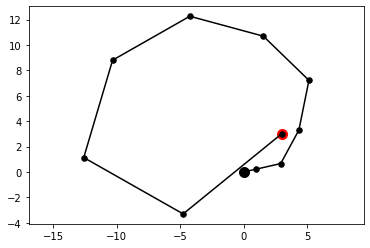

cost func: 0.0
best: [0.21510009 0.008775   0.84960147 0.29768323 1.00100059 0.5047401
 0.78181678 0.76572988 1.34281192 1.19857005]


In [8]:
l = np.arange(10)+1
dest = np.array([3, 3])
inverse_kin(l, dest, domain=(0, np.pi/2), max_iters=500)